# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

In [107]:
tweets = []

with open('./data/file2') as file:
    for _ in range(15):
        tweets.append(file.readline())

In [110]:
tweets

['Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com\n',
 'Its american tradition bitch\n',
 "@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones\n",
 '" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"\n',
 "Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m\n",
 "@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.\n",
 'iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki\n',
 'RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!\n',
 "RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI\n",
 'Hey dol

1. **Input tweet:** Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
      
   **Tokenized tweet:** Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

2. **Input tweet:** Its american tradition bitch

   **Tokenized tweet:** Its , american , tradition , bitch

3. **Input tweet:** @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
   
   **Tokenized tweet:** @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually,  do , that , . , I'm , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

4. **Input tweet:**" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
   
   **Tokenized tweet:** " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , - , - , - , " , " , I , tweet , because , I'm , happy , , , I , tweet , because , I'm , free , " , " , LOL , ! , "

5. **Input tweet:** Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
   
   **Tokenized tweet:** Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m

6. **Input tweet:** @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
   
   **Tokenized tweet:** @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

7. **Input tweet:** iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
   
   **Tokenized tweet:** iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki

8. **Input tweet:** RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
   
   **Tokenized tweet:** RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !

9. **Input tweet:** RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
   
   **Tokenized tweet:** RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

10. **Input tweet:** Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
   
   **Tokenized tweet:** Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

11. **Input tweet:** Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
   
   **Tokenized tweet:** Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

12. **Input tweet:** @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    
    **Tokenized tweet:** @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

13. **Input tweet:** Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    
    **Tokenized tweet:** Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv

14. **Input tweet:** Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    
    **Tokenized tweet:** Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

15. **Input tweet:** Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    
    **Tokenized tweet:** Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [1]:
import matplotlib.pyplot as plt
from typing import List
from collections import defaultdict
import pandas as pd

In [105]:
class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        """
        Initialize the Byte Pair Encoding Tokenizer.

        Args:
            vocab_size (int): The size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.splits = defaultdict(int)  # dictionary, where the key is a word divided into characters, and the value is the number of occurrences of this word in the corpus
        self.vocab = set()  # vocabalury for the coprus
        self.vocab.add('_')
        self.merge_order = []  # the order in which pairs of elements are combined. This array is required to perform greedy tokenization.
    
    def _init_vocab(self, corpus) -> None:
        """
        Create initial splits for each word and vocabulary with letters
        
        Args:
            corpus (List[str]): List of sentences in the corpus.
        """
        for sentence in corpus:
            for word in sentence.split():
                self.splits[' '.join(word) + ' _'] += 1
                for char in word:
                    self.vocab.add(char)
                
    def _get_stats(self) -> tuple:
        """
        Get the most frequent pair of characters based on the current merges.

        Returns:
            tuple: The most frequent pair of characters.
        """
        pairs = defaultdict(int)
        
        for word, counts in self.splits.items():
            char_list = word.split()
            for i in range(len(char_list) - 1):
                pairs[(char_list[i], char_list[i + 1])] += counts
        return max(pairs, key=pairs.get)
         
    def _merge_splits(self, pair: tuple) -> None:
        """
        Merge the splits based on a pair of characters.

        Args:
            pair (tuple): The pair of characters to merge.
        """
        new_vocab = defaultdict(int)
        for word, counts in self.splits.items():
            w_out = word.replace(' '.join(pair), ''.join(pair))  # if a word contains a pair of characters, replace it by merging them
            new_vocab[w_out] += counts
        self.splits = new_vocab.copy()

    def train(self, corpus: List[str]) -> None:
        """
        Train the tokenizer on the input corpus until we reach a vocabulary size.

        Args:
            corpus (List[str]): List of sentences in the corpus.
        """
        self._init_vocab(corpus)
        while len(self.vocab) < self.vocab_size:
            pair = self._get_stats()
            self.vocab.add(''.join(pair))
            self.merge_order.append(pair)
            self._merge_splits(pair)
            
    def tokenize(self, text: str) -> List[str]:
        """
        Tokenize the input text using the trained tokenizer.

        Args:
            text (str): Input text to tokenize.

        Returns:
            List[str]: List of tokens generated from the input text.
        """
        words = text.split()
        
        output = []
        for word in words:
            word_tokens = ' '.join(word) + '_'
            
            for pair in self.merge_order:
                word_tokens = word_tokens.replace(' '.join(pair), ''.join(pair))
            output.extend(word_tokens.split())
        return output

In [64]:
all_tweets = []

for i in range(1, 6):
    with open(f'./data/file{i}') as file:
        all_tweets += file.readlines()

### Example

In [67]:
bpe = BPETokenizer(400)
bpe.train(all_tweets)

In [72]:
print("Input sentence:", all_tweets[0], "\nTokenized sentence:", ' '.join(bpe.tokenize(all_tweets[0])))

Input sentence: @anitapuspasari waduh..
 
Tokenized sentence: @ anit apus p as ari_ w ad u h .._


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [84]:
x = [i for i in range(200, 1100, 100)]
y = []

In [85]:
for vocab_size in x:
    bpe = BPETokenizer(vocab_size)
    bpe.train(all_tweets)
    sum_len = 0
    for tweet in all_tweets:
        sum_len += len(bpe.tokenize(tweet))
    y.append(sum_len / len(all_tweets))

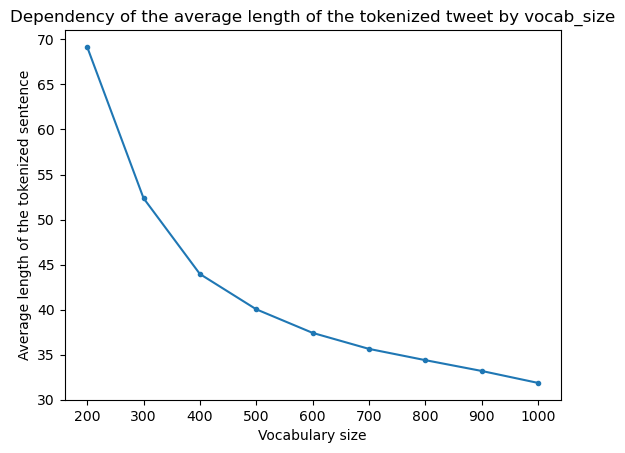

In [86]:
plt.plot(x, y, marker='.')
plt.xlabel("Vocabulary size")
plt.ylabel("Average length of the tokenized sentence")
plt.title("Dependency of the average length of the tokenized tweet by vocab_size")
plt.show()

### Conclusion

I think we can use the elbow rule to determine the best vocabulary size. It will be around 600-700. I also recommend taking into account the training time of the tokenizer, for such a small dataset it does not matter, but for a larger one it can take time.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

I took a [dataset](https://www.kaggle.com/datasets/abireltaief/books-reviews) of French book reviews and only took the review column.

In [89]:
df = list(pd.read_csv('./data/french_books_reviews.csv')['reader_review'].dropna().values)

In [96]:
x = [i for i in range(400, 1501, 250)]
y = []

In [97]:
for vocab_size in x:
    bpe = BPETokenizer(vocab_size)
    bpe.train(df)
    sum_len = 0
    for tweet in df:
        sum_len += len(bpe.tokenize(tweet))
    y.append(sum_len / len(df))

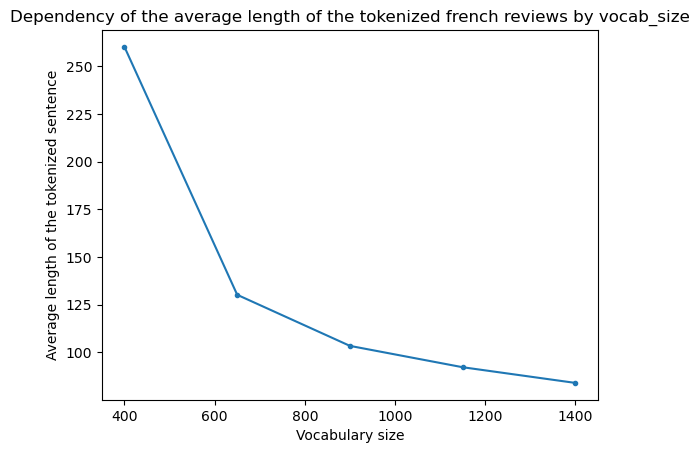

In [100]:
plt.plot(x, y, marker='.')
plt.xlabel("Vocabulary size")
plt.ylabel("Average length of the tokenized sentence")
plt.title("Dependency of the average length of the tokenized french reviews by vocab_size")
plt.show()

### Conclusion

As you can see from the figures, the average length of book reviews is longer than the average length of tweets. I think this is because of the source of the data, since often reviews consist of information about the plot, characters, author, etc., but a tweet consists of only a short story or thoughts of the author.